# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [1]:
import numpy as np
import pandas as pd
from statsmodels.tsa.stattools import adfuller


# Challenge 1 - Loading and Evaluating The Data

In this lab, we will look at a dataset of sensor data from a cellular phone. The phone was carried in the subject's pocket for a few minutes while they walked around.

To load the data, run the code below.

In [2]:
# Run this code:

sensor = pd.read_csv('../sub_1.csv')
sensor.drop(columns =['Unnamed: 0'], inplace = True)
#sensor = sensor [[e for e in sensor.columns if e != 'Unnamed: 0' ]] 


Examine the data using the `head` function.

In [3]:
sensor.head()

attitude.roll  attitude.pitch  attitude.yaw  gravity.x  gravity.y  \
0       1.528132       -0.733896      0.696372   0.741895   0.669768   
1       1.527992       -0.716987      0.677762   0.753099   0.657116   
2       1.527765       -0.706999      0.670951   0.759611   0.649555   
3       1.516768       -0.704678      0.675735   0.760709   0.647788   
4       1.493941       -0.703918      0.672994   0.760062   0.647210   

   gravity.z  rotationRate.x  rotationRate.y  rotationRate.z  \
0  -0.031672        0.316738        0.778180        1.082764   
1  -0.032255        0.842032        0.424446        0.643574   
2  -0.032707       -0.138143       -0.040741        0.343563   
3  -0.041140       -0.025005       -1.048717        0.035860   
4  -0.058530        0.114253       -0.912890        0.047341   

   userAcceleration.x  userAcceleration.y  userAcceleration.z  
0            0.294894           -0.184493            0.377542  
1            0.219405            0.035846            0.114866  
2            0.010714            0.134701           -0.167808  
3           -0.008389            0.136788            0.094958  
4            0.199441            0.353996           -0.044299

Check whether there is any missing data. If there is any missing data, remove the rows containing missing data.

In [4]:
sensor.isnull().sum()

attitude.roll         0
attitude.pitch        0
attitude.yaw          0
gravity.x             0
gravity.y             0
gravity.z             0
rotationRate.x        0
rotationRate.y        0
rotationRate.z        0
userAcceleration.x    0
userAcceleration.y    0
userAcceleration.z    0
dtype: int64

How many rows and columns are in our data?

In [5]:
sensor.shape
#se tienen 12 columnas y 1751 observaciones.

(1751, 12)

In [6]:
len(sensor)

1751

To perform time series analysis on the data, we must change the index from a range index to a time series index. In the cell below, create a time series index using the `pd.date_range` function. Create a time series index starting at 1/1/2018 00:00:00 and ending at 1/1/2018 00:29:10. The number of periods is equal to the number of rows in `sensor`. The frequency should be set to `infer`.

Assign the time series index to the dataframe's index.

In [30]:
# Your code here:
x =pd.date_range(start='1/1/2018 00:00:00', end ='1/1/2018 00:29:10', periods = len(sensor))
sensor.index = pd.DatetimeIndex(x)

In [31]:
sensor.head()

attitude.roll  attitude.pitch  attitude.yaw  gravity.x  \
2018-01-01 00:00:00       1.528132       -0.733896      0.696372   0.741895   
2018-01-01 00:00:01       1.527992       -0.716987      0.677762   0.753099   
2018-01-01 00:00:02       1.527765       -0.706999      0.670951   0.759611   
2018-01-01 00:00:03       1.516768       -0.704678      0.675735   0.760709   
2018-01-01 00:00:04       1.493941       -0.703918      0.672994   0.760062   

                     gravity.y  gravity.z  rotationRate.x  rotationRate.y  \
2018-01-01 00:00:00   0.669768  -0.031672        0.316738        0.778180   
2018-01-01 00:00:01   0.657116  -0.032255        0.842032        0.424446   
2018-01-01 00:00:02   0.649555  -0.032707       -0.138143       -0.040741   
2018-01-01 00:00:03   0.647788  -0.041140       -0.025005       -1.048717   
2018-01-01 00:00:04   0.647210  -0.058530        0.114253       -0.912890   

                     rotationRate.z  userAcceleration.x  userAcceleration.y  \
2018-01-01 00:00:00        1.082764            0.294894           -0.184493   
2018-01-01 00:00:01        0.643574            0.219405            0.035846   
2018-01-01 00:00:02        0.343563            0.010714            0.134701   
2018-01-01 00:00:03        0.035860           -0.008389            0.136788   
2018-01-01 00:00:04        0.047341            0.199441            0.353996   

                     userAcceleration.z  
2018-01-01 00:00:00            0.377542  
2018-01-01 00:00:01            0.114866  
2018-01-01 00:00:02           -0.167808  
2018-01-01 00:00:03            0.094958  
2018-01-01 00:00:04           -0.044299

Our next step is to decompose the time series and evaluate the patterns in the data. Load the `statsmodels.api` submodule and plot the decomposed plot of `userAcceleration.x`. Set `freq=60` in the `seasonal_decompose` function. Your graph should look like the one below.

![time series decomposition](../images/tsa_decompose.png)

In [32]:
import statsmodels.api as sm

res = sm.tsa.seasonal_decompose(sensor['userAcceleration.x'])
#resplot = res.plot()

ValueError: freq S not understood. Please report if you think this is in error.

# Challenge 2 - Modelling the Data

To model our data, we should look at a few assumptions. First, let's plot the `lag_plot` to detect any autocorrelation. Do this for `userAcceleration.x`

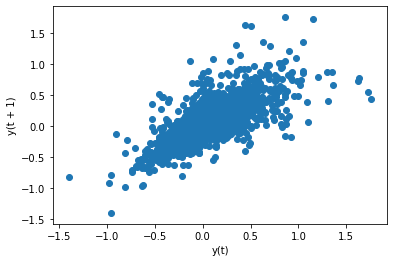

In [35]:
from pandas.plotting import lag_plot

X=lag_plot(sensor['userAcceleration.x']);

Create a lag plot for `rotationRate.x`

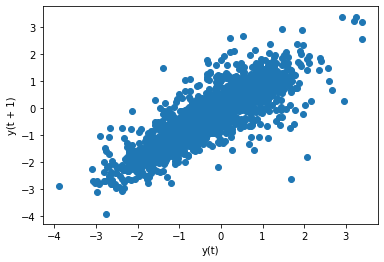

In [36]:
Y = lag_plot(sensor['rotationRate.x'])

What are your conclusions from both visualizations?

In [ ]:
# En la variable de rotationRate.x se puede ver mas un patrón lineal más defidino,
# se puede sugerir que hay autocorrelación positiva, ya que se ve una tendencia de izquierda
# a derecha, sin embargo como los datos no están tan alineados, la autocorrelación no 
# sería tan alta.

# Por otra parte en la variable userAcceleration.x se podría decir que los datos no son
# del todo random, por que se ve una ligera tendencia linea (muy pequeña).

The next step will be to test both variables for stationarity. Perform the Augmented Dickey Fuller test on both variables below.

In [ ]:
# Fuller test.
# Ho: If failed to be rejected, it suggests the time series has a unit root, meaning it is non-stationary.
# H1: The time series does not have a unit root, meaning it is stationary.


In [40]:
fuller_acce = adfuller(sensor['userAcceleration.x'])
fuller_acce

(-17.95799408616976,
 2.823439483037483e-30,
 4,
 1746,
 {'1%': -3.434100824760071,
  '5%': -2.863196780129223,
  '10%': -2.5676520210882936},
 -727.6140124402791)

In [42]:
fuller_rot = adfuller(sensor['rotationRate.x'])
fuller_rot

(-5.269860625086415,
 6.3202303359123905e-06,
 25,
 1725,
 {'1%': -3.4341465551936534,
  '5%': -2.863216966926812,
  '10%': -2.567662770090317},
 2619.6049719981947)

What are your conclusions from this test?

In [ ]:
#  En ambos casos el p-value < .05, por lo que la prueba sugiere que ninguna de las dos
# variables es estacionaria.


Finally, we'll create an ARMA model for `userAcceleration.x`. Load the `ARMA` function from `statsmodels`. The order of the model is (2, 1). Split the data to train and test. Use the last 10 observations as the test set and all other observations as the training set. 

In [62]:
test = sensor['userAcceleration.x'][-10:]
train = sensor['userAcceleration.x'][:-10]

In [77]:
import warnings
warnings.simplefilter('ignore')
from statsmodels.tsa.arima_model import ARMA

modelo=ARMA(train, order=(2, 1)).fit()  
#pred=modelo.predict(len(train), sensor['userAcceleration.x']-1)
#error=(pred-test).abs().sum()/len(pred)
#print ('Cota de error : {}'.format(error))

To compare our predictions with the observed data, we can compute the RMSE (Root Mean Squared Error) from the submodule `statsmodels.tools.eval_measures`. You can read more about this function [here](https://www.statsmodels.org/dev/generated/statsmodels.tools.eval_measures.rmse.html). Compute the RMSE for the last 10 rows of the data by comparing the observed and predicted data for the `userAcceleration.x` column.